In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('conventional_data_unique.csv')
y_ = data['consensus_act']

/ihome/gidakwo/anaconda3/envs/ml_env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = data.rename(columns={'consensus_act': 'Classes'})

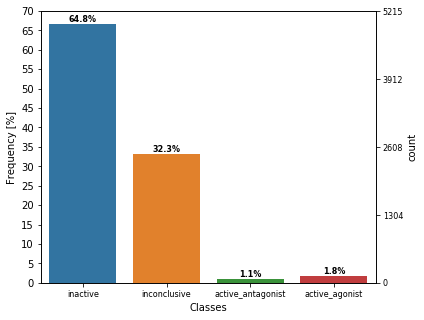

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

ncount = len(data)

plt.figure(figsize=(6,5))
ax = sns.countplot(x="Classes", data=data)
#plt.title('Class Distribution')
plt.xlabel('Classes', fontsize=10)
#plt.xticks(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=8)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', weight='bold', fontsize=8) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.xaxis.label.set_size(10)
ax2.yaxis.label.set_size(10)
ax2.set_ylim([0,70])

ax.yaxis.label.set_size(10)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
#ax2.grid(None)
#ax.grid(None)

plt.savefig('data_stat45.svg')

In [22]:
#A plot of Chemical Space (Using MWt and LogP)

import pubchempy as pcp

def pubchem_sid_to_SMILES(sid):
    try:
        substance = pcp.Substance.from_sid(sid)
        #print(substance)
        c_id = substance.standardized_cid
        cpd = pcp.Compound.from_cid(c_id)
        return cpd.isomeric_smiles
    except:
        return 'Failed'

In [23]:
data['SMILES'] = data['PUBCHEM_SID'].apply(lambda x: pubchem_sid_to_SMILES(x))

In [29]:
from rdkit.Chem import Descriptors
from rdkit import Chem

def molwt(smi):
    try:
        m = Chem.MolFromSmiles(smi)
        return Descriptors.MolWt(m)
    except:
        return 'NaN'

def logP(smi):
    try:
        m = Chem.MolFromSmiles(smi)
        return Descriptors.MolLogP(m)
    except:
        return 'NaN'

In [33]:
from sklearn.model_selection import train_test_split


y = data['Classes']
X_train, X_test, y_train, y_test = train_test_split(data, y.values, stratify=y, test_size=0.1)

In [34]:
test_raw = pd.DataFrame()
train_raw = pd.DataFrame()
test_raw['MolWt'] = X_test['SMILES'].apply(molwt)
train_raw['MolWt'] = X_train['SMILES'].apply(molwt)


test_raw['LogP'] = X_test['SMILES'].apply(logP)
train_raw['LogP'] = X_train['SMILES'].apply(logP)

#test_raw['smiles'] = data['SMILES']
#train_raw['smiles'] = data['SMILES']

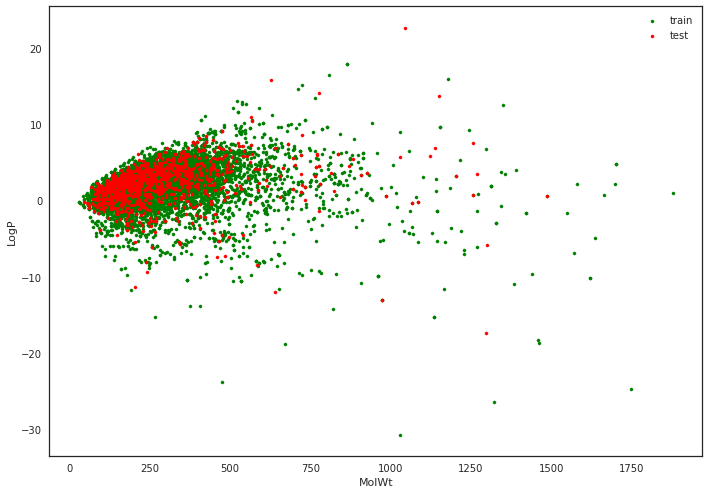

In [38]:
from matplotlib import pyplot as plt
plt.scatter(train_raw['MolWt'], train_raw['LogP'], c='g', label='train',s=10)
plt.scatter(test_raw['MolWt'], test_raw['LogP'], color='r', label='test',s=10)
plt.xlabel('MolWt')
plt.ylabel('LogP')
#plt.title('Chemical Space of AR Mode of Action Data')
plt.legend(loc='upper right')
plt.show()

In [28]:
test_raw['MolWt'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: MolWt, dtype: object

In [ ]:
#The logP value of a compound, which is the logarithm of its partition coefficient between n-octanol and water log(coctanol/cwater), is a well established measure of the compound's hydrophilicity. Low hydrophilicities and therefore high logP values cause poor absorption or permeation. It has been shown for compounds to have a reasonable propability of being well absorbt their logP value must not be greater than 5.0. 

In [28]:
data['Classes'].value_counts()

inactive             4967
inconclusive         2476
active_agonist        140
active_antagonist      82
Name: Classes, dtype: int64